In [7]:
import geopandas as gpd
import geopandas.geoseries
from shapely.geometry import Polygon

In [8]:
p1 = Polygon([[-122.5, 45.48565],
              [-122.801742, 45.5],
              [-122.82, 45.6],
              [-122.584762, 45.691],
              [-122.4, 45.48]])
p2 = Polygon([
    [-122.520217, 45.535693],
    [-122.64038, 45.553967],
    [-122.720031, 45.526554],
    [-122.669906, 45.507309],
    [-122.723464, 45.446643],
    [-122.532577, 45.408574],
    [-122.487258, 45.477466]
])

In [9]:
p1box = Polygon([[p1.bounds[0], p1.bounds[1]],
                 [p1.bounds[0], p1.bounds[1]],
                 [p1.bounds[2], p1.bounds[1]],
                 [p1.bounds[2], p1.bounds[3]],
                 [p1.bounds[0], p1.bounds[3]]
                 ])

p2box = Polygon([[p2.bounds[0], p2.bounds[1]],
                 [p2.bounds[0], p2.bounds[1]],
                 [p2.bounds[2], p2.bounds[1]],
                 [p2.bounds[2], p2.bounds[3]],
                 [p2.bounds[0], p2.bounds[3]]
                 ])

In [10]:
p3 = p1 & p2 #p1box&p2box

In [11]:
m = gpd.GeoSeries([p1])

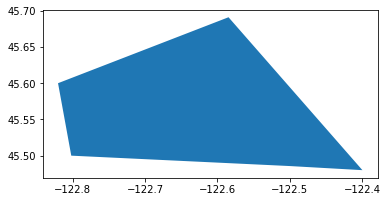

In [12]:
m.plot() 

In [13]:
n = gpd.GeoSeries([p2])

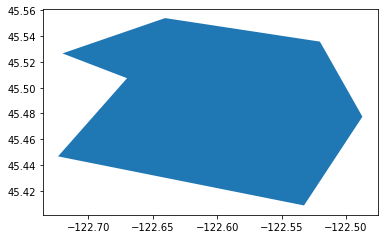

In [14]:
n.plot()

In [15]:
g = gpd.GeoSeries([p1, p2])#[p1, p2, p1box, p2box]

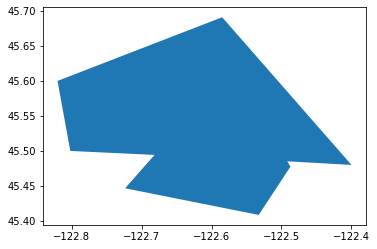

In [16]:
g.plot()

In [17]:
g1 = gpd.GeoSeries([p3]) #[p1box, p2box, p3]
print(p3)

POLYGON ((-122.5 45.48565, -122.6814107515488 45.49427738460249, -122.669906 45.507309, -122.720031 45.526554, -122.64038 45.553967, -122.520217 45.535693, -122.491622575796 45.48517667553247, -122.5 45.48565))


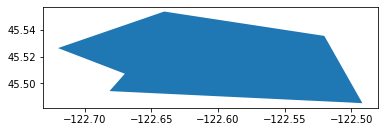

In [18]:
g1.plot()

In [19]:
print(p3.area)

0.009995401375602453


In [20]:
aa = Polygon([[0,1],
            [0,0],
            [1,0]])

bb = Polygon([[3,1],
            [3,0],
            [4,0]])

cc = aa&bb


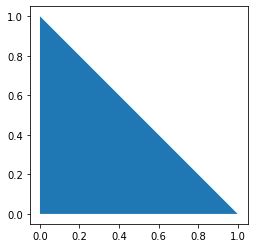

In [21]:
gpd.GeoSeries([aa]).plot()

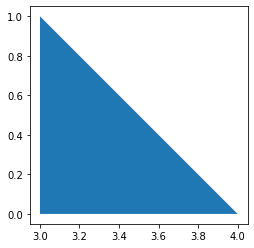

In [22]:
gpd.GeoSeries([bb]).plot()

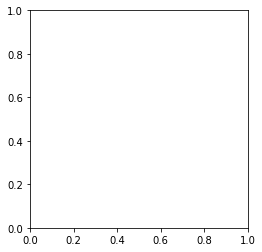

In [23]:
gpd.GeoSeries([cc]).plot()

In [24]:
cc.area

0.0

In [25]:
a_long = 33
a_lat = 43
a_azimuth = 0 

length_dist = 2000
angle_list = [(-75,0.2),(-60,0.4),(-45,0.6),(-32.5,1),(-17,1.2),(0,1.3),(17,1.2),(32.5,1),(45,0.6),(60,0.4),(75,0.2)]

In [26]:
import math
def calc_coor(angle, coef, length):
    return coef*math.cos(angle)*length,coef*math.sin(angle)*length

def calc_points(long,lat,azimuth,length_dist,angle_list):
    azimuth = 90-azimuth
    result_list = [[long+calc_coor((azimuth+angle)/180*math.pi, coef, length_dist)[0],
                    lat+calc_coor((azimuth+angle)/180*math.pi, coef, length_dist)[1]] for (angle, coef) in angle_list]
    result_list.insert(0,[long,lat])
    return result_list
cov = calc_points(a_long,a_lat,a_azimuth,length_dist,angle_list)
for each in cov:
    print(each)

[33, 43]
[419.37033051562736, 146.52761804100828]
[725.820323027551, 442.99999999999994]
[881.5281374238571, 891.5281374238571]
[1107.5992166936478, 1729.7828916257713]
[734.6920913345682, 2338.131414311285]
[33.000000000000156, 2643.0]
[-668.692091334568, 2338.1314143112854]
[-1041.599216693648, 1729.7828916257713]
[-815.528137423857, 891.5281374238571]
[-659.820323027551, 442.99999999999994]
[-353.3703305156273, 146.5276180410084]


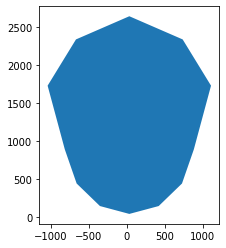

In [27]:
cov_poly = Polygon(cov)
gpd.GeoSeries([cov_poly]).plot()